# Central Limit Theorem example

Here, we try adding uniform distributions a few times and we quickly end up with a Gaussian.


In [1]:
from typing import Optional

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

The idea is simple: generate random values between $-1$ and $1$ and make a histogram of them. The histogram will look like a box.

The Central Limit Theorem tells us that the mean of $N$ variables with variance $\sigma^2$ is a Gaussian with variance $\sigma^2/N$ in the limit that $N \rightarrow \infty$.

Notice that the variance of this uniform distribution is not 1: calculate it, and you will see that its variance is 1/3 (so $\sqrt{\text{var}}=\sqrt{3}/3\approxeq 0.57$). We will see that below.


In [2]:
# this generates random uniform samples
def random_samples(n_samples: int) -> np.ndarray:
    return (2*np.random.rand(n_samples) - 1)

Let's make a function to generate samples.

In [3]:
n_samples = 10000
x = random_samples(n_samples)

x has now arbitrary numbers between $-1$ and $1$:

In [4]:
pd.DataFrame(dict(x=x))

,x
0,-0.436331
1,-0.639195
2,0.458218
3,0.248118
4,-0.769285
...,...
9995,-0.104365
9996,0.246559
9997,-0.747142
9998,-0.283905


Let's check its mean and variance:

In [5]:
pd.DataFrame(dict(x=x)).describe()

,x
count,10000.000000
mean,0.005463
std,0.581949
min,-0.999997
25%,-0.502165
50%,0.006750
75%,0.515157
max,0.999962


We can make a histogram of it to try to double check:

/home/daniloefl/miniconda3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/daniloefl/miniconda3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/daniloefl/miniconda3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


[Text(0, 0.5, 'Fraction of occurrences / bin size'), Text(0.5, 0, 'x')]

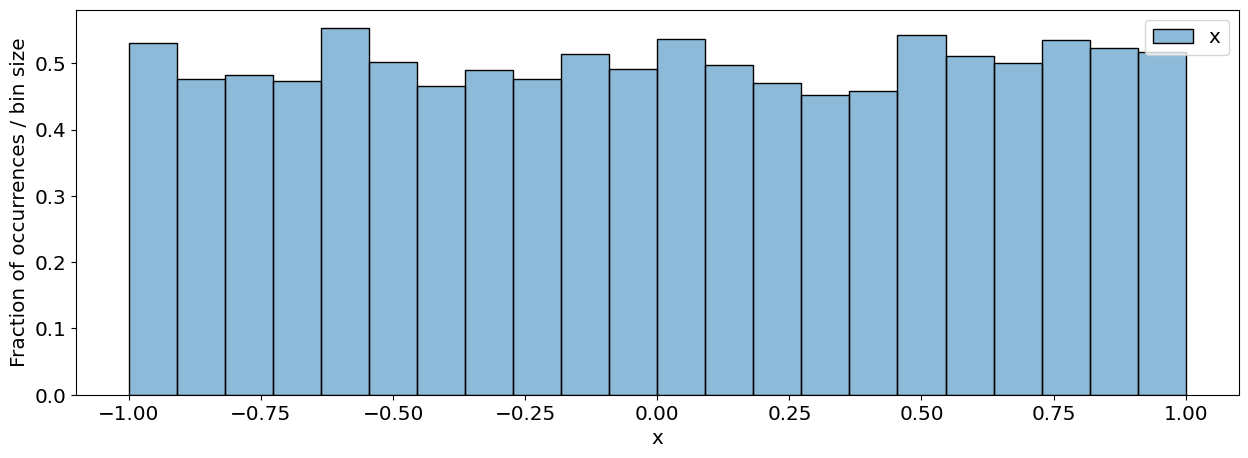

In [6]:
sns.histplot(pd.DataFrame(dict(x=x)), stat="density")
plt.gca().set(ylabel="Fraction of occurrences / bin size", xlabel="x")

It looks like the probability of getting a specific x value is indeed the same for all x in the range [-1, 1].

Let's get values of x independently and sum them $N$ times:

In [7]:
def get_many_x(N: int) -> pd.DataFrame:
    return pd.DataFrame({f"x{k}": random_samples(n_samples) for k in range(N)})

In [8]:
N = 10
data = get_many_x(N=10)

In [9]:
data

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,-0.021048,0.624256,-0.213331,0.873981,-0.744169,-0.295821,0.033295,-0.249991,0.482630,0.892960
1,-0.481733,0.707507,0.250378,-0.289964,0.192630,-0.117562,0.553985,0.511281,-0.841345,0.200531
2,-0.317442,0.502972,0.375717,0.033442,-0.281267,0.300927,-0.598245,0.843422,-0.629739,-0.069668
3,-0.161197,0.732069,0.441334,0.868591,0.635648,-0.168180,-0.673598,-0.165261,-0.806899,-0.753438
4,-0.371950,-0.188998,-0.219916,0.815982,0.127839,-0.533913,0.075909,0.098488,0.563604,-0.334205
...,...,...,...,...,...,...,...,...,...,...
9995,0.815217,0.136989,-0.264895,0.950940,-0.402690,0.816257,-0.848535,-0.520143,-0.564143,0.758220
9996,-0.601188,0.329444,0.400244,-0.631055,-0.035561,-0.479244,0.151432,-0.260616,-0.735051,0.219002
9997,-0.577752,-0.498329,-0.637509,-0.720854,0.519939,-0.315098,0.610658,-0.587285,0.542854,0.783085
9998,-0.390503,-0.137664,-0.201412,-0.199943,-0.997903,-0.017195,-0.712091,0.725895,0.888849,-0.100168


Each x column has independent values of a uniform distribution. We can double check that:

/home/daniloefl/miniconda3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/daniloefl/miniconda3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/daniloefl/miniconda3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/daniloefl/miniconda3/envs/ml/lib/python

[Text(0, 0.5, 'Fraction of occurrences / bin size'), Text(0.5, 0, 'x')]

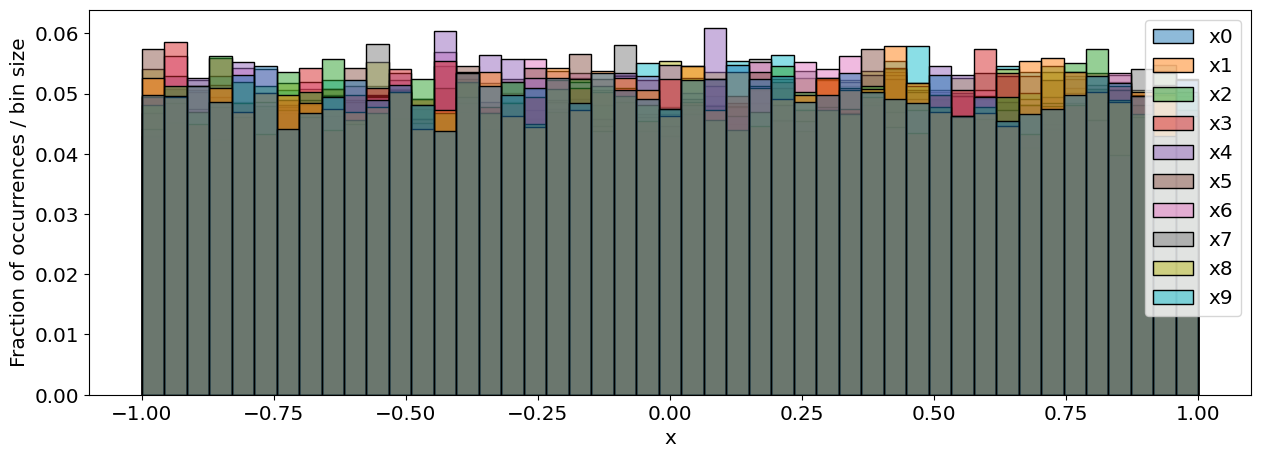

In [10]:
sns.histplot(data.loc[:, [f"x{k}" for k in range(N)]], stat="density")
plt.gca().set(ylabel="Fraction of occurrences / bin size", xlabel="x")

They all look mostly flat. Now let's create a new variable, called "mean_x_0_{k}", which will be the mean of the x variables from 0 until the k-th element:

In [11]:
for k in range(N):
    data[f"mean_x_0_{k}"] = sum(data.loc[:, f"x{i}"] for i in range(k+1))/float(k+1)

Let's histogram these sums:

/home/daniloefl/miniconda3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


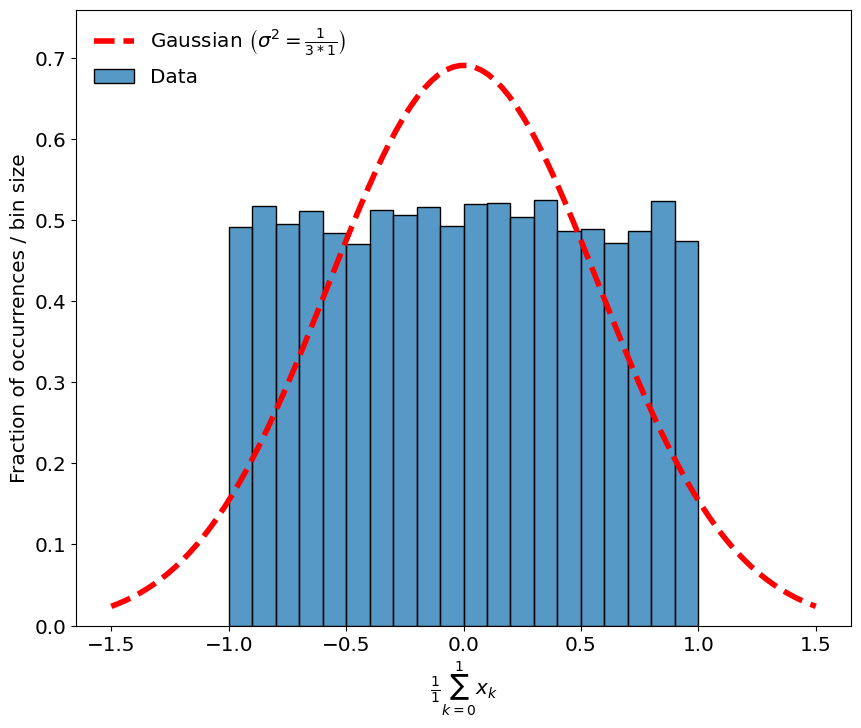

/home/daniloefl/miniconda3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


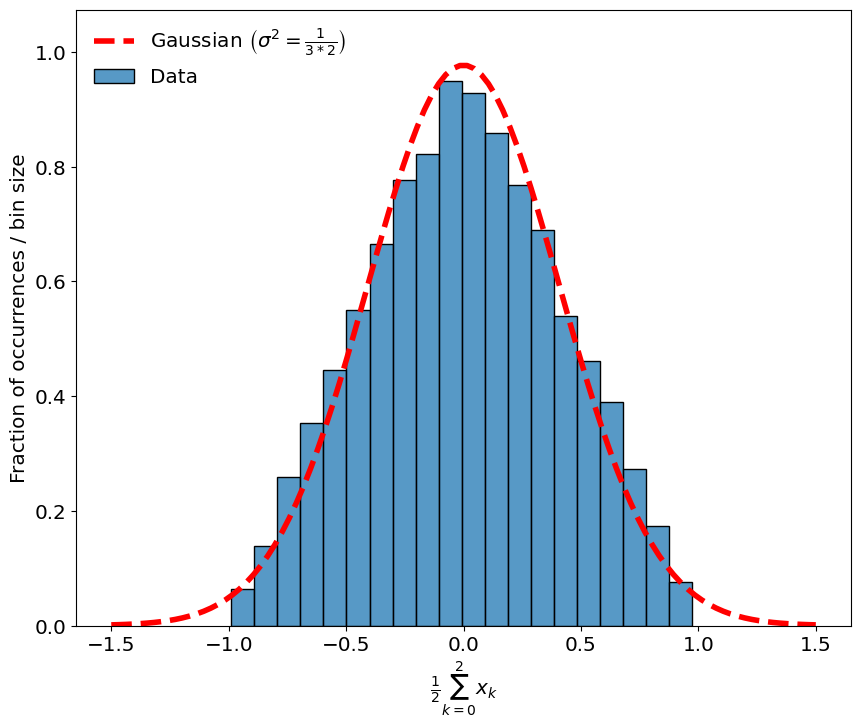

/home/daniloefl/miniconda3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


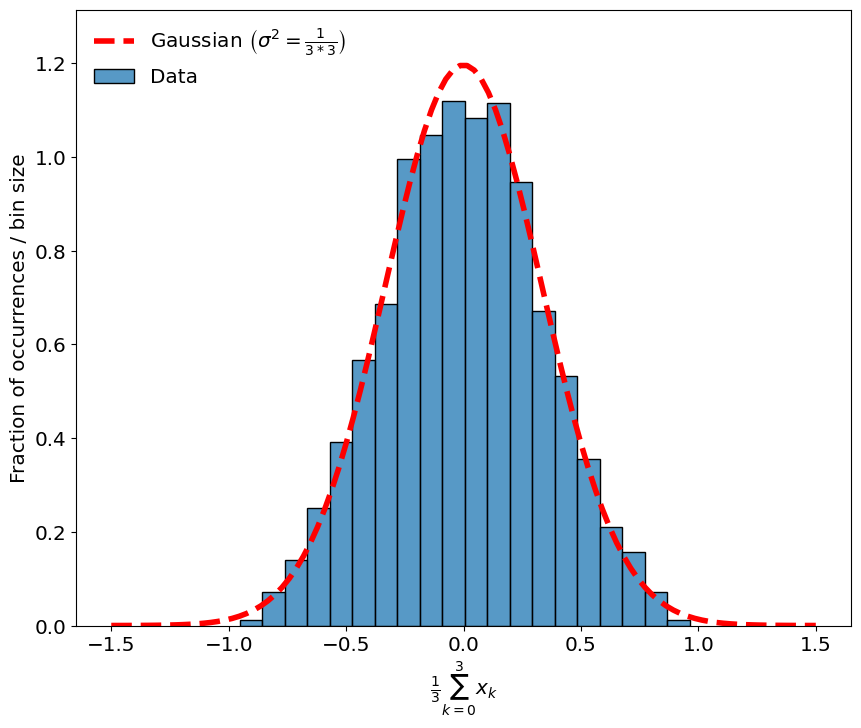

/home/daniloefl/miniconda3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


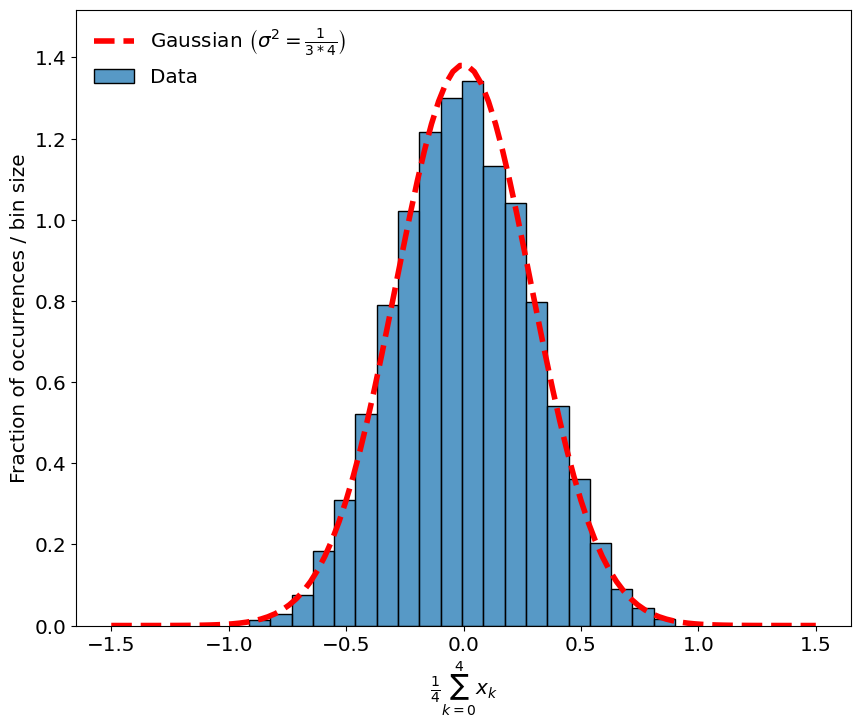

/home/daniloefl/miniconda3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


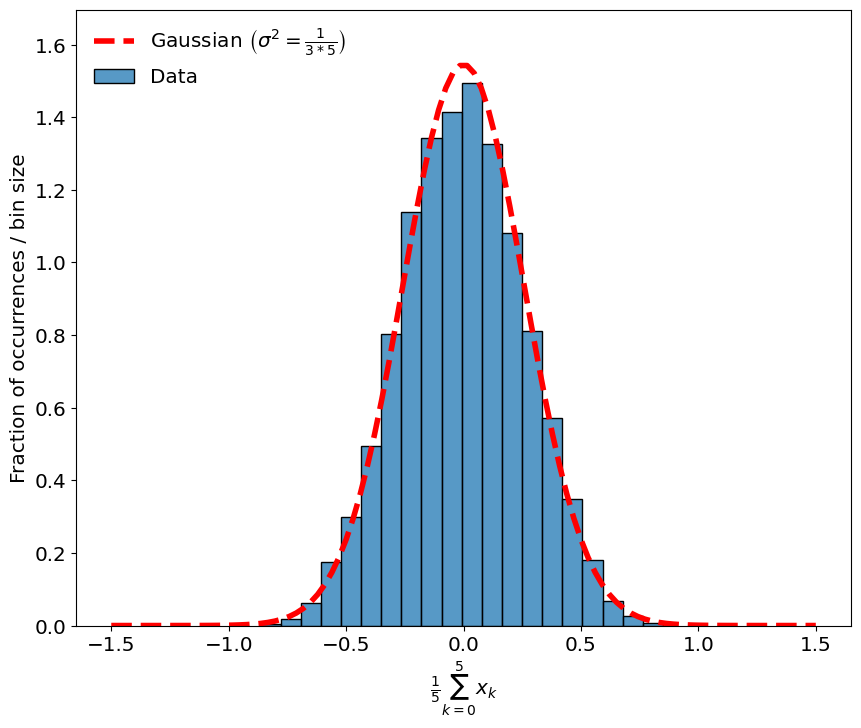

/home/daniloefl/miniconda3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


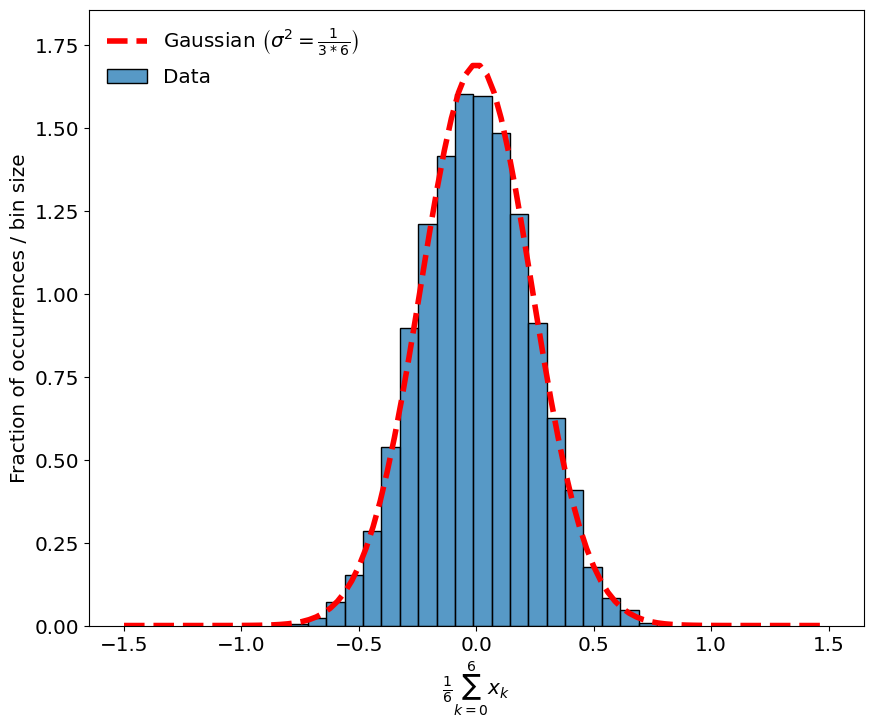

/home/daniloefl/miniconda3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


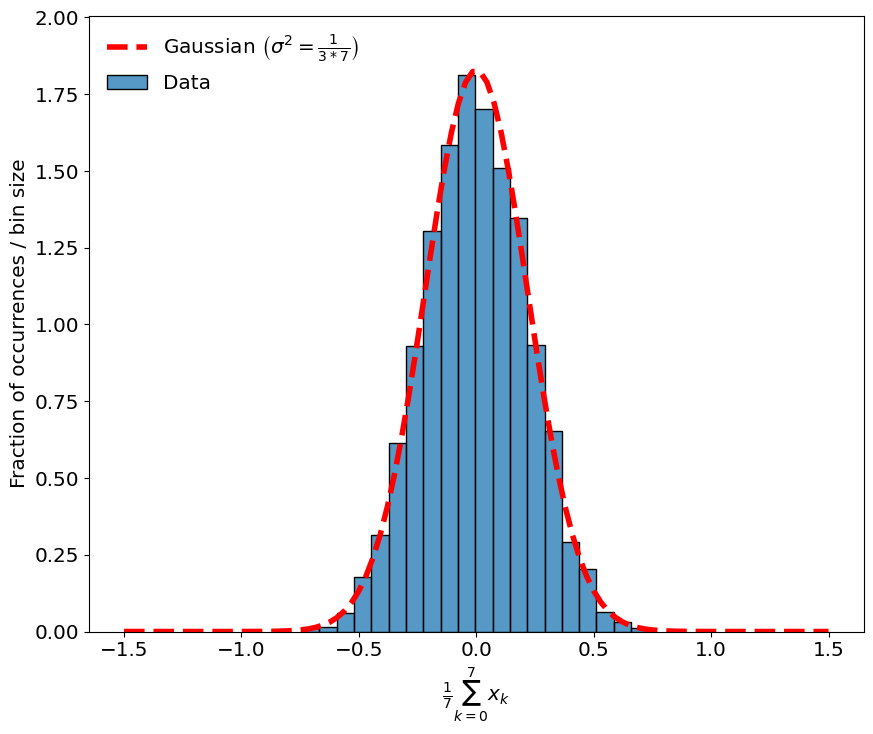

/home/daniloefl/miniconda3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


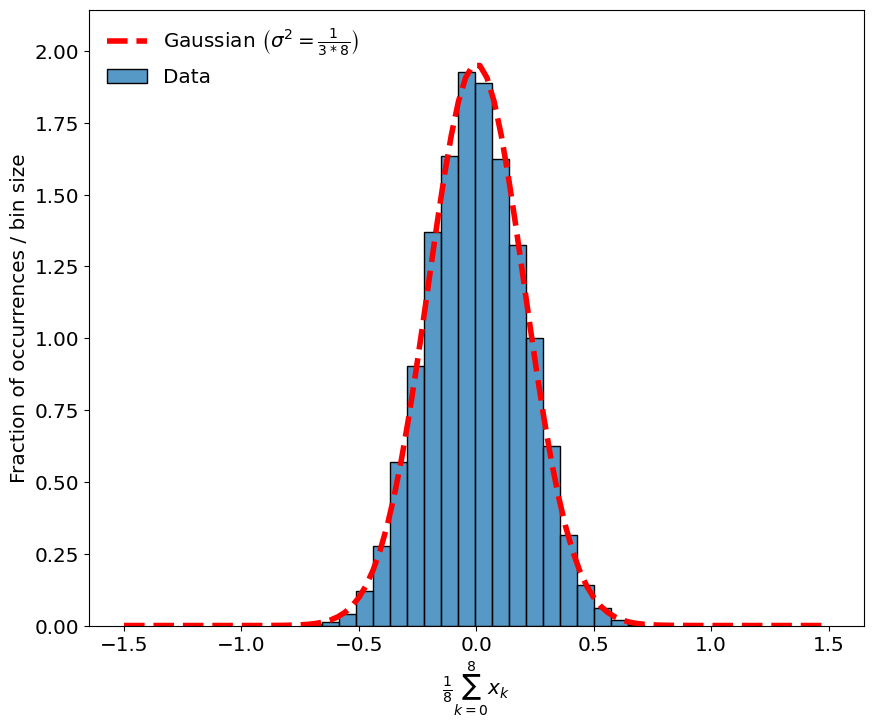

/home/daniloefl/miniconda3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


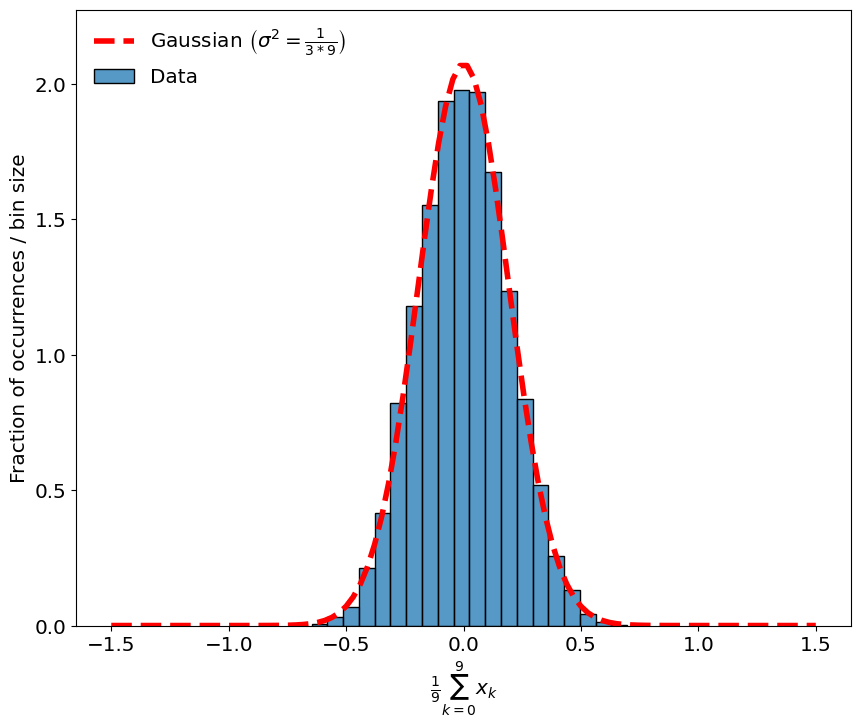

/home/daniloefl/miniconda3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


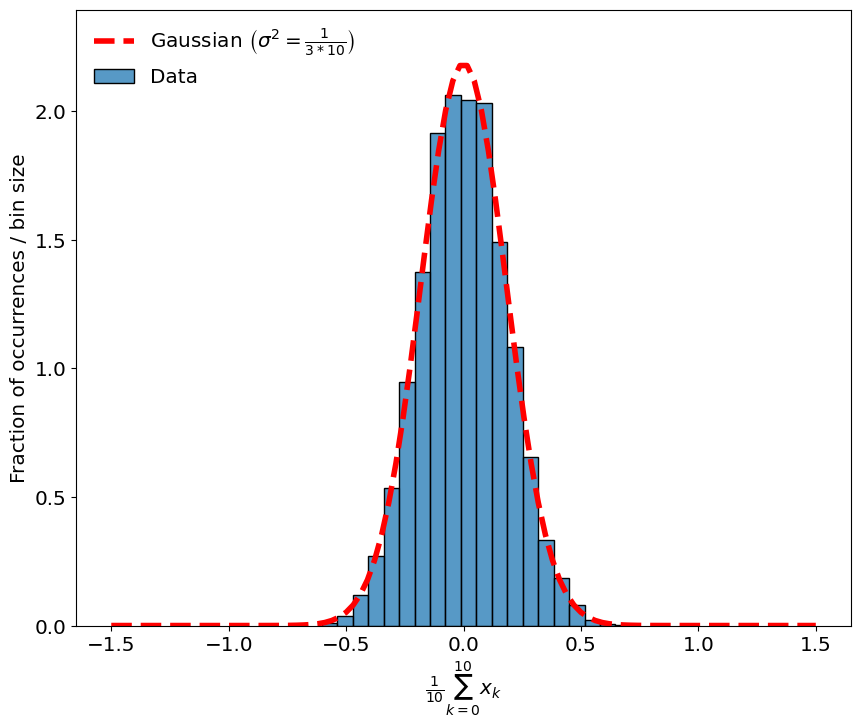

In [12]:
original_variance = 1/3
for k in range(N):
    nbins = 20
    fig = plt.figure(figsize=(10, 8))
    sns.histplot(data=data, x=f"mean_x_0_{k}", bins=nbins, stat="density", label="Data")
    xg = np.linspace(-1.5, 1.5, 100)
    yg = 1/np.sqrt(2*np.pi*original_variance/(k+1))*np.exp(-xg**2/2/(original_variance/(k+1)))
    plt.plot(xg, yg, label=r"Gaussian $\left(\sigma^2 = \frac{1}{3 * "+f"{k+1}"+r"}\right)$", ls="--", color="r", lw=4)
    plt.gca().set(xlabel=r"$\frac{1}{"+f"{k+1}"+r"}\sum_{k=0}^{"+f"{k+1}"+r"} x_{k}$", ylabel="Fraction of occurrences / bin size", ylim=(0, np.amax(yg)*1.1))
    plt.legend(frameon=False, loc="upper left")
    plt.savefig(f"clt_{k}.png")
    plt.show()

In [13]:
# mean for 1000 variables:
mean_many = sum(random_samples(n_samples) for k in range(1000))/1000

/home/daniloefl/miniconda3/envs/ml/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


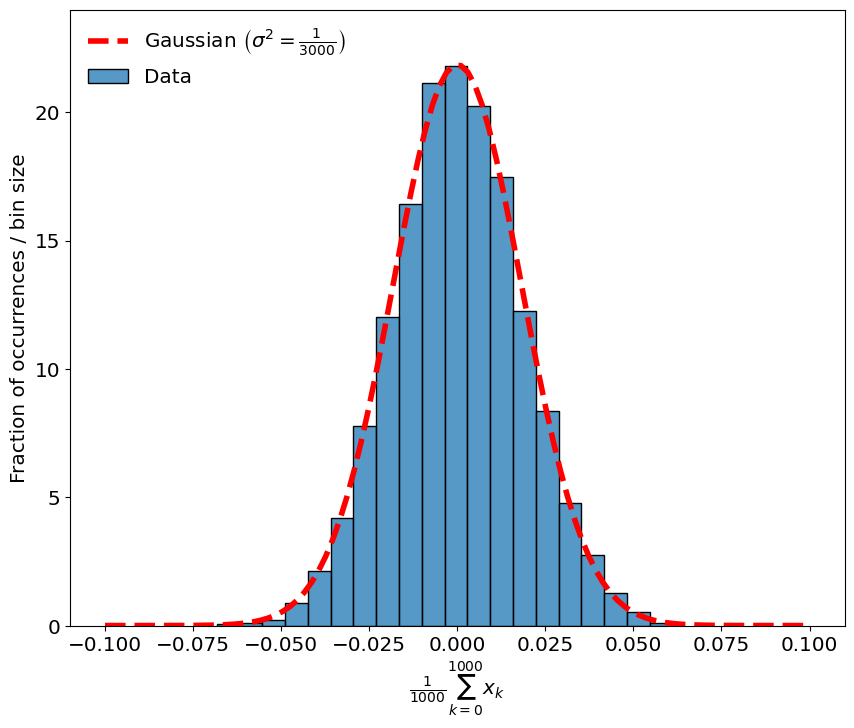

In [14]:
nbins = 20
fig = plt.figure(figsize=(10, 8))
sns.histplot(data=mean_many, bins=nbins, stat="density", label="Data")
xg = np.linspace(-0.1, 0.1, 100)
yg = 1/np.sqrt(2*np.pi/3/1000)*np.exp(-xg**2/2/(1/3/1000))
plt.plot(xg, yg, label=r"Gaussian $\left(\sigma^2 = \frac{1}{3000}\right)$", ls="--", color="r", lw=4)
plt.gca().set(xlabel=r"$\frac{1}{1000}\sum_{k=0}^{1000} x_{k}$", ylabel="Fraction of occurrences / bin size", ylim=(0, np.amax(yg)*1.1))
plt.legend(frameon=False, loc="upper left")
plt.savefig(f"clt_many.png")
plt.show()